## ANZ Data

### Data Clean

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df =pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
# fill authorized with 1 , posted 0
df.loc[df['status'].eq('authorized'), 'card_present_flag'] = 1
df.loc[df['status'].eq('posted'), 'card_present_flag'] = 0
# fill bpay_biller_code, merchant_code with 0
df.bpay_biller_code=df.bpay_biller_code.fillna(0)
df.merchant_code = df. merchant_code.fillna(0)
# fill other NAN with not available
df=df.fillna('Not Available')

df.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,0.0,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,0.0,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,0.0,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,0.0,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,0.0,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,0.0,0,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,Not Available,0.0,Robert,...,20,Not Available,Not Available,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,Not Available,debit
6,authorized,1.0,0,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,0.0,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,0,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,0.0,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,0,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,0.0,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,0.0,0,ACC-602667573,AUD,151.23 -33.96,INTER BANK,Not Available,0.0,Michael,...,40,Not Available,Not Available,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,Not Available,debit


In [4]:
maxamount = max(df.amount)
minamount = min(df.amount)
print(f'the min amount is {minamount}, the max amount is {maxamount}')

the min amount is 0.1, the max amount is 8835.98


### Overall Insights

{'whiskers': [<matplotlib.lines.Line2D at 0x7f83e8ec1310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f840a7030a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83e8eb3f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8418de80d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8418dec5b0>],
 'means': []}

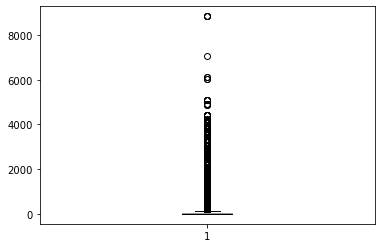

In [5]:
plt.boxplot(df.amount)

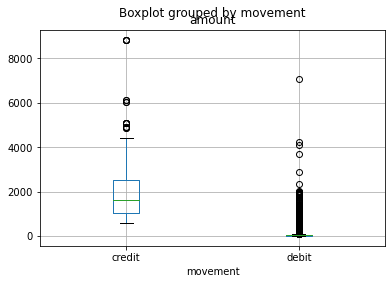

In [6]:
boxplot = df.boxplot(column='amount',by='movement')  

In [7]:
day_trans=df.groupby('date').size()
daily_revenue=df.groupby('date')['amount'].agg('sum')
total_trans = np.cumsum(day_trans)
cum_daily_revenue = np.cumsum(daily_revenue)

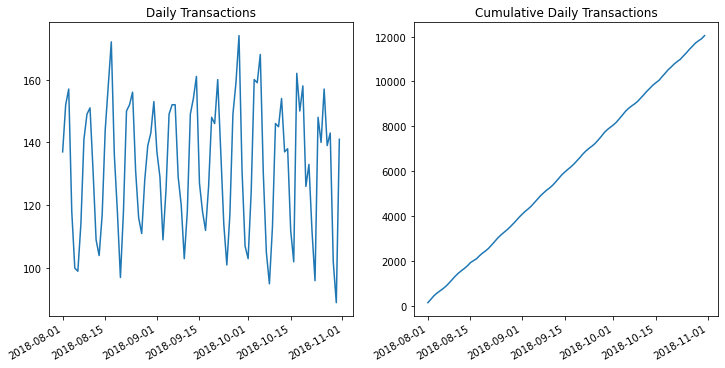

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.plot(day_trans)
ax1.set_title('Daily Transactions')
ax2.plot(total_trans)
ax2.set_title('Cumulative Daily Transactions')
fig.autofmt_xdate()

In [9]:
daily_revenue=df.groupby('date')['amount'].agg('sum')
cum_daily_revenue = np.cumsum(daily_revenue)

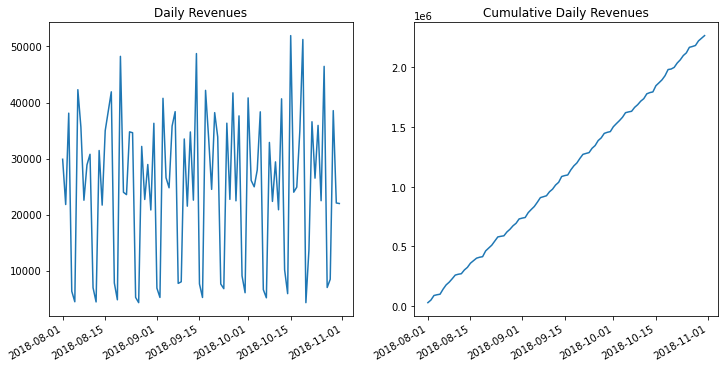

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.plot(daily_revenue)
ax1.set_title('Daily Revenues')
ax2.plot(cum_daily_revenue)
ax2.set_title('Cumulative Daily Revenues')
fig.autofmt_xdate()

In [11]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [12]:
weekly_revenue=df['amount'].resample('W').sum()
monthly_revenue=df['amount'].resample('M').sum()

(array([17744., 17758., 17775., 17789., 17805., 17819., 17836.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

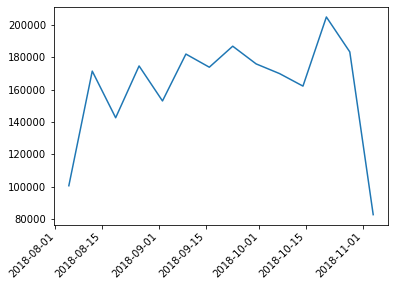

In [13]:
plt.plot(weekly_revenue)
plt.xticks(rotation=45, ha='right')

<AxesSubplot:ylabel='amount'>

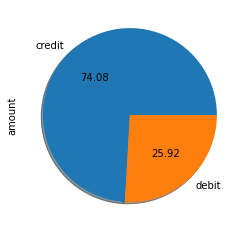

In [14]:
df.groupby(['movement'])['amount'].sum().plot(kind='pie',shadow=True,autopct="%.2f")

<AxesSubplot:ylabel='amount'>

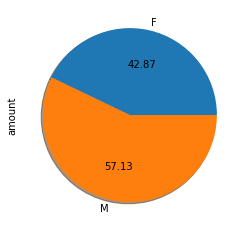

In [15]:
df.groupby(['gender'])['amount'].sum().plot(kind='pie',shadow=True,autopct="%.2f")

<AxesSubplot:ylabel='gender,movement'>

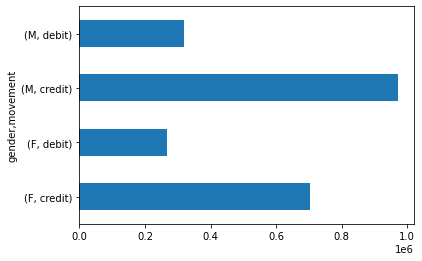

In [16]:
df.groupby(['gender','movement'])['amount'].sum().plot(kind='barh',stacked=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(18, 28]'),
  Text(1, 0, '(28, 38]'),
  Text(2, 0, '(38, 48]'),
  Text(3, 0, '(48, 58]'),
  Text(4, 0, '(58, 68]'),
  Text(5, 0, '(68, 78]')])

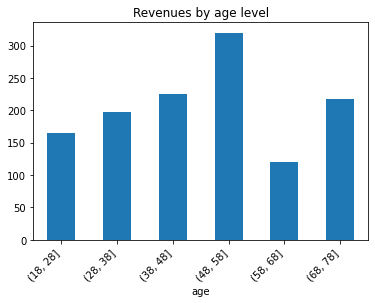

In [279]:
age_groups = pd.cut(df['age'], bins=[18, 28, 38,48,58,68,78])
df.groupby(age_groups)['amount'].mean().plot(kind='bar',stacked=True)
plt.title('Revenues by age level')
plt.xticks(rotation=45, ha='right')

<AxesSubplot:xlabel='first_name'>

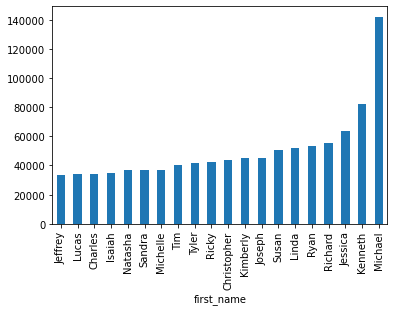

In [280]:
df.groupby(['first_name'])['amount'].sum().sort_values().tail(20).plot(kind='bar')

<AxesSubplot:xlabel='first_name'>

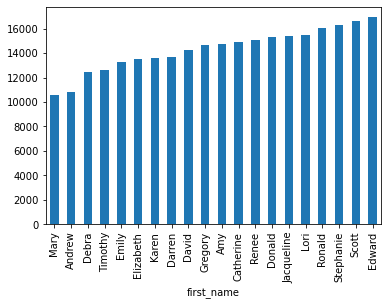

In [281]:
df.groupby(['first_name'])['amount'].sum().sort_values().head(20).plot(kind='bar')

## Predictive Analytics

### annual salary for each customer

In [282]:
trans_number = df.groupby(['first_name'])['status'].count().reset_index(['first_name'])

In [283]:
df1=df[df['txn_description']=='PAY/SALARY']
df1=df1.groupby(['first_name','age','gender'])['balance'].sum().reset_index(name='Salary')
df1=df1.merge(trans_number)
df1=df1.rename(columns={'status':'Num of Transactions'})
column_names = ['first_name','gender','age','Num of Transactions','Salary']
df1 = df1.reindex(columns=column_names)
#df1 = pd.DataFrame(df1)
df1

,first_name,gender,age,Num of Transactions,Salary
0,Abigail,F,40,102,151094.12
1,Alexander,M,38,91,92901.74
2,Amy,F,43,124,26484.20
3,Andrew,M,78,34,657477.50
4,Antonio,M,26,115,78678.67
...,...,...,...,...,...
95,Timothy,M,20,72,42000.30
96,Tonya,F,27,292,50023.10
97,Tyler,M,44,218,49934.57
98,Tyler,M,69,218,94283.29


###  correlations between annual salary and various customer attributes

In [284]:
df1.corr()

,age,Num of Transactions,Salary
age,1.000000,-0.136160,0.289224
Num of Transactions,-0.136160,1.000000,-0.037192
Salary,0.289224,-0.037192,1.000000


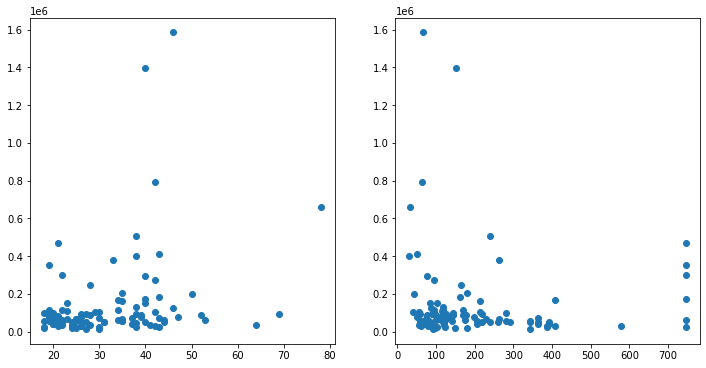

In [285]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.scatter(df1.age,df1.Salary)
ax2.scatter(df1['Num of Transactions'],df1.Salary)

### Simple Regression

In [286]:
#Age and Salary
X = df1.iloc[:,1:-1].values
y = df1.iloc[:,-1].values


In [287]:
#Encoding Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
gd = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X = np.array(gd.fit_transform(X))
# 1 FEMALE, 0 MALE
X

array([[1.0, 0.0, 40, 102],
       [0.0, 1.0, 38, 91],
       [1.0, 0.0, 43, 124],
       [0.0, 1.0, 78, 34],
       [0.0, 1.0, 26, 115],
       [1.0, 0.0, 25, 75],
       [0.0, 1.0, 38, 122],
       [0.0, 1.0, 52, 77],
       [0.0, 1.0, 42, 63],
       [1.0, 0.0, 26, 62],
       [0.0, 1.0, 18, 145],
       [1.0, 0.0, 39, 139],
       [0.0, 1.0, 33, 263],
       [0.0, 1.0, 35, 263],
       [1.0, 0.0, 19, 51],
       [0.0, 1.0, 28, 165],
       [0.0, 1.0, 22, 123],
       [0.0, 1.0, 20, 58],
       [0.0, 1.0, 42, 40],
       [1.0, 0.0, 18, 98],
       [0.0, 1.0, 20, 141],
       [1.0, 0.0, 26, 578],
       [0.0, 1.0, 22, 55],
       [0.0, 1.0, 28, 80],
       [0.0, 1.0, 19, 170],
       [1.0, 0.0, 50, 44],
       [1.0, 0.0, 43, 52],
       [0.0, 1.0, 22, 96],
       [0.0, 1.0, 42, 96],
       [0.0, 1.0, 19, 97],
       [0.0, 1.0, 42, 80],
       [1.0, 0.0, 41, 121],
       [0.0, 1.0, 23, 116],
       [1.0, 0.0, 30, 92],
       [0.0, 1.0, 28, 169],
       [0.0, 1.0, 24, 388],
       [0.0

In [228]:
#SPLIT TRAIN AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [229]:
# REGRESSION
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [230]:
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 33805.54560733584
Coefficients: 
 [ 534.1  -534.1  2702.86   10.88]


In [222]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # print numericals only with 2 decimals places
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 151128.26  409793.72]
 [ 138579.61  506145.72]
 [ 151911.35   26484.2 ]
 [  84100.53   26536.67]
 [ 145271.05   51472.2 ]
 [ 104412.72   67715.64]
 [  94072.18   59122.64]
 [  91926.33   48462.09]
 [ 107619.12   95447.77]
 [  88111.77   42000.3 ]
 [  91119.17   83700.42]
 [  91463.98   97942.75]
 [ 137236.28   72025.43]
 [ 130732.06   65301.33]
 [ 174657.72   86898.05]
 [ 147661.73   28575.85]
 [  93332.6    37087.99]
 [  86474.78  114059.67]
 [ 116426.11   14129.58]
 [ 147476.84  792776.29]
 [ 105266.62   94134.87]
 [  98145.22  467645.22]
 [ 244464.44  657477.5 ]
 [ 158331.79 1584768.28]
 [ 130199.12  164255.24]
 [ 132670.35   54704.11]
 [ 137307.09   43956.52]
 [  90561.25   76688.05]
 [ 127520.33  114575.08]
 [  96693.36   48995.72]
 [ 116045.44  105638.82]
 [  89580.06   40760.94]
 [ 178385.27   61342.65]
 [  87629.99   88893.08]]


In [259]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [290]:
regressor.predict([[1,20]])

array([75015.58])

In [257]:
import statsmodels.api as sm


df2=df1.copy()
M = pd.get_dummies(df2['gender'], prefix='gender', drop_first=True)
M.head(3)
X=df2[['age','Num of Transactions']]
y=df2['Salary']
fullX = pd.concat([X, M['gender_M']], axis=1)

model = sm.OLS(y, fullX).fit()
model.summary()
predictions = model.predict(fullX) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.339
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              16.59
Date:                Thu, 10 Feb 2022   Prob (F-statistic):                    8.92e-09
Time:                        13:29:17   Log-Likelihood:                         -1373.4
No. Observations:                 100   AIC:                                      2753.
Df Residuals:                      97   BIC:                                      2761.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------